# pandas and numpy

In [4]:
# Customarily, we import as follows:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Objetc Creation

In [6]:
# Creating a Series by passing a list of values, letting pandas create a default integer index:
s = pd.Series([1,3,5,np.nan,7,9])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    7.0
5    9.0
dtype: float64

In [7]:
# Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:
dates = pd.date_range('20151011', periods=7)
dates

DatetimeIndex(['2015-10-11', '2015-10-12', '2015-10-13', '2015-10-14',
               '2015-10-15', '2015-10-16', '2015-10-17'],
              dtype='datetime64[ns]', freq='D')

In [8]:
# Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:
df = pd.DataFrame(np.random.randn(7,6), index=dates, columns=list('QWERTY'))
df

,Q,W,E,R,T,Y
2015-10-11,0.004645,-0.205579,-1.192710,0.999901,-1.093466,0.448484
2015-10-12,-0.006018,2.271131,-0.324137,0.049282,-0.716313,-0.850050
2015-10-13,-1.005563,-0.659142,1.260974,-1.317586,-0.914087,-1.468940
2015-10-14,-0.759468,1.172447,0.095055,-0.617069,0.414646,-1.882781
2015-10-15,0.558975,-2.032759,0.711714,-2.347986,0.528232,0.108794
2015-10-16,-0.171601,1.242399,0.696924,0.109267,-0.177922,-0.544408
2015-10-17,-0.463814,0.755799,1.232348,0.437331,-1.011349,0.613064


In [9]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like.
df2 = pd.DataFrame({  'A' : 1.,
                      'B' : pd.Timestamp('20151011'),
                      'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                      'D' : np.array([3] * 4,dtype='int32'),
                      'E' : pd.Categorical(["test","train","test","train"]),
                      'F' : 'neo'})
df2

,A,B,C,D,E,F
0,1.0,2015-10-11,1.0,3,test,neo
1,1.0,2015-10-11,1.0,3,train,neo
2,1.0,2015-10-11,1.0,3,test,neo
3,1.0,2015-10-11,1.0,3,train,neo


In [10]:
# Having specific dtypes
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [11]:
# If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled.
# Here’s a subset of the attributes that will be completed:
#df2.A                  df2.boxplot
#df2.abs                df2.C
#df2.add                df2.clip
#df2.add_prefix         df2.clip_lower
#df2.add_suffix         df2.clip_upper
#df2.align              df2.columns
#df2.all                df2.combine
#df2.any                df2.combineAdd
#df2.append             df2.combine_first
#df2.apply              df2.combineMult
#df2.applymap           df2.compound
#df2.as_blocks          df2.consolidate
#df2.asfreq             df2.convert_objects
#df2.as_matrix          df2.copy
#df2.astype             df2.corr
#df2.at                 df2.corrwith
#df2.at_time            df2.count
#df2.axes               df2.cov
#df2.B                  df2.cummax
#df2.between_time       df2.cummin
#df2.bfill              df2.cumprod
#df2.blocks             df2.cumsum
#df2.bool               df2.D
df2.consolidate

<bound method NDFrame.consolidate of      A          B    C  D      E    F
0  1.0 2015-10-11  1.0  3   test  neo
1  1.0 2015-10-11  1.0  3  train  neo
2  1.0 2015-10-11  1.0  3   test  neo
3  1.0 2015-10-11  1.0  3  train  neo>

## Viewing Data 

In [12]:
# See the Basics section
# See the top & bottom rows of the frame
df.head()

,Q,W,E,R,T,Y
2015-10-11,0.004645,-0.205579,-1.192710,0.999901,-1.093466,0.448484
2015-10-12,-0.006018,2.271131,-0.324137,0.049282,-0.716313,-0.850050
2015-10-13,-1.005563,-0.659142,1.260974,-1.317586,-0.914087,-1.468940
2015-10-14,-0.759468,1.172447,0.095055,-0.617069,0.414646,-1.882781
2015-10-15,0.558975,-2.032759,0.711714,-2.347986,0.528232,0.108794


In [13]:
df.tail(3)

,Q,W,E,R,T,Y
2015-10-15,0.558975,-2.032759,0.711714,-2.347986,0.528232,0.108794
2015-10-16,-0.171601,1.242399,0.696924,0.109267,-0.177922,-0.544408
2015-10-17,-0.463814,0.755799,1.232348,0.437331,-1.011349,0.613064


In [14]:
df.index

DatetimeIndex(['2015-10-11', '2015-10-12', '2015-10-13', '2015-10-14',
               '2015-10-15', '2015-10-16', '2015-10-17'],
              dtype='datetime64[ns]', freq='D')

In [15]:
# Display the index, columns, and the underlying numpy data
df.columns

Index(['Q', 'W', 'E', 'R', 'T', 'Y'], dtype='object')

In [16]:
# Describe shows a quick statistic summary of your data
df.values

array([[ 0.00464521, -0.20557938, -1.19271   ,  0.99990147, -1.09346572,
         0.44848391],
       [-0.00601783,  2.27113146, -0.32413672,  0.0492825 , -0.71631306,
        -0.85005   ],
       [-1.00556274, -0.65914215,  1.26097418, -1.3175859 , -0.91408681,
        -1.46893982],
       [-0.75946771,  1.1724469 ,  0.09505462, -0.61706942,  0.41464587,
        -1.88278148],
       [ 0.55897482, -2.03275913,  0.71171424, -2.34798594,  0.52823153,
         0.10879439],
       [-0.1716008 ,  1.24239891,  0.69692364,  0.10926724, -0.17792204,
        -0.54440818],
       [-0.46381437,  0.75579877,  1.23234767,  0.43733134, -1.0113493 ,
         0.61306426]])

In [17]:
# Describe shows a quick statistic summary of your data
df.describe()

,Q,W,E,R,T,Y
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,-0.263263,0.363471,0.354310,-0.383837,-0.424323,-0.510834
std,0.525971,1.433616,0.890588,1.140465,0.681838,0.956014
min,-1.005563,-2.032759,-1.192710,-2.347986,-1.093466,-1.882781
25%,-0.611641,-0.432361,-0.114541,-0.967328,-0.962718,-1.159495
50%,-0.171601,0.755799,0.696924,0.049282,-0.716313,-0.544408
75%,-0.000686,1.207423,0.972031,0.273299,0.118362,0.278639
max,0.558975,2.271131,1.260974,0.999901,0.528232,0.613064


In [18]:
# Transposing your data
df.T

,2015-10-11 00:00:00,2015-10-12 00:00:00,2015-10-13 00:00:00,2015-10-14 00:00:00,2015-10-15 00:00:00,2015-10-16 00:00:00,2015-10-17 00:00:00
Q,0.004645,-0.006018,-1.005563,-0.759468,0.558975,-0.171601,-0.463814
W,-0.205579,2.271131,-0.659142,1.172447,-2.032759,1.242399,0.755799
E,-1.192710,-0.324137,1.260974,0.095055,0.711714,0.696924,1.232348
R,0.999901,0.049282,-1.317586,-0.617069,-2.347986,0.109267,0.437331
T,-1.093466,-0.716313,-0.914087,0.414646,0.528232,-0.177922,-1.011349
Y,0.448484,-0.850050,-1.468940,-1.882781,0.108794,-0.544408,0.613064


In [19]:
# Sorting by an axis
df.sort_index(axis=1, ascending=False)

,Y,W,T,R,Q,E
2015-10-11,0.448484,-0.205579,-1.093466,0.999901,0.004645,-1.192710
2015-10-12,-0.850050,2.271131,-0.716313,0.049282,-0.006018,-0.324137
2015-10-13,-1.468940,-0.659142,-0.914087,-1.317586,-1.005563,1.260974
2015-10-14,-1.882781,1.172447,0.414646,-0.617069,-0.759468,0.095055
2015-10-15,0.108794,-2.032759,0.528232,-2.347986,0.558975,0.711714
2015-10-16,-0.544408,1.242399,-0.177922,0.109267,-0.171601,0.696924
2015-10-17,0.613064,0.755799,-1.011349,0.437331,-0.463814,1.232348


In [20]:
# Sorting by values
df.sort_values(by='R')

,Q,W,E,R,T,Y
2015-10-15,0.558975,-2.032759,0.711714,-2.347986,0.528232,0.108794
2015-10-13,-1.005563,-0.659142,1.260974,-1.317586,-0.914087,-1.468940
2015-10-14,-0.759468,1.172447,0.095055,-0.617069,0.414646,-1.882781
2015-10-12,-0.006018,2.271131,-0.324137,0.049282,-0.716313,-0.850050
2015-10-16,-0.171601,1.242399,0.696924,0.109267,-0.177922,-0.544408
2015-10-17,-0.463814,0.755799,1.232348,0.437331,-1.011349,0.613064
2015-10-11,0.004645,-0.205579,-1.192710,0.999901,-1.093466,0.448484


## Selection 

In [21]:
### Note While standard Python / Numpy expressions for selecting and setting are intuitive 
### and come in handy for interactive work, for production code, we recommend the optimized 
### pandas data access methods, .at, .iat, .loc, .iloc and .ix.

In [22]:
# See the indexing documentation Indexing and Selecing Data and MultiIndex / Advanced Indexing

## Getting 

In [23]:
#Selecting a single column, which yields a Series, equivalent to df.A
df['Q']

2015-10-11    0.004645
2015-10-12   -0.006018
2015-10-13   -1.005563
2015-10-14   -0.759468
2015-10-15    0.558975
2015-10-16   -0.171601
2015-10-17   -0.463814
Freq: D, Name: Q, dtype: float64

In [24]:
# Selecting via [], which slices the rows.
df[0:3]

,Q,W,E,R,T,Y
2015-10-11,0.004645,-0.205579,-1.192710,0.999901,-1.093466,0.448484
2015-10-12,-0.006018,2.271131,-0.324137,0.049282,-0.716313,-0.850050
2015-10-13,-1.005563,-0.659142,1.260974,-1.317586,-0.914087,-1.468940


In [25]:
df['20151011':'20151013']

,Q,W,E,R,T,Y
2015-10-11,0.004645,-0.205579,-1.192710,0.999901,-1.093466,0.448484
2015-10-12,-0.006018,2.271131,-0.324137,0.049282,-0.716313,-0.850050
2015-10-13,-1.005563,-0.659142,1.260974,-1.317586,-0.914087,-1.468940


## Selection by Label 

In [26]:
# See more in Selection by Label
# For getting a cross section using a label

In [27]:
df.loc[:,['Q','E','Y']]

,Q,E,Y
2015-10-11,0.004645,-1.192710,0.448484
2015-10-12,-0.006018,-0.324137,-0.850050
2015-10-13,-1.005563,1.260974,-1.468940
2015-10-14,-0.759468,0.095055,-1.882781
2015-10-15,0.558975,0.711714,0.108794
2015-10-16,-0.171601,0.696924,-0.544408
2015-10-17,-0.463814,1.232348,0.613064


In [28]:
# Showing label slicing, both endpoints are included
df.loc['20151011':'20151015', ['Q','R']]

,Q,R
2015-10-11,0.004645,0.999901
2015-10-12,-0.006018,0.049282
2015-10-13,-1.005563,-1.317586
2015-10-14,-0.759468,-0.617069
2015-10-15,0.558975,-2.347986


In [29]:
# Reduction in the dimensions of the returned object
df.loc['20151011', ['R','T','Y']]

R    0.999901
T   -1.093466
Y    0.448484
Name: 2015-10-11 00:00:00, dtype: float64

In [30]:
# For getting a scalar value
df.loc[dates[0],'Q']

0.004645208393920686

In [31]:
# For getting fast access to a scalar (equiv to the prior method)
df.at[dates[0],'Q']

0.004645208393920686

## Selection by Position 

In [32]:
# See more in Selection by Position
# Select via the position of the passed integers

In [33]:
# Select via the position of the passed integers
df.iloc[3]

Q   -0.759468
W    1.172447
E    0.095055
R   -0.617069
T    0.414646
Y   -1.882781
Name: 2015-10-14 00:00:00, dtype: float64

In [34]:
# By integer slices, acting similar to numpy/python
df.iloc[0:4,0:3]

,Q,W,E
2015-10-11,0.004645,-0.205579,-1.192710
2015-10-12,-0.006018,2.271131,-0.324137
2015-10-13,-1.005563,-0.659142,1.260974
2015-10-14,-0.759468,1.172447,0.095055


In [35]:
# By lists of integer position locations, similar to the numpy/python style
df.iloc[[0,2,3],[0,5]]

,Q,Y
2015-10-11,0.004645,0.448484
2015-10-13,-1.005563,-1.468940
2015-10-14,-0.759468,-1.882781


In [36]:
# For slicing rows explicitly
df.iloc[1:3,:]

,Q,W,E,R,T,Y
2015-10-12,-0.006018,2.271131,-0.324137,0.049282,-0.716313,-0.85005
2015-10-13,-1.005563,-0.659142,1.260974,-1.317586,-0.914087,-1.46894


In [37]:
# For slicing columns explicitly
df.iloc[:,1:3]

,W,E
2015-10-11,-0.205579,-1.192710
2015-10-12,2.271131,-0.324137
2015-10-13,-0.659142,1.260974
2015-10-14,1.172447,0.095055
2015-10-15,-2.032759,0.711714
2015-10-16,1.242399,0.696924
2015-10-17,0.755799,1.232348


In [38]:
# For getting a value explicitly
df.iloc[1,1]

2.2711314620129954

In [39]:
# For getting fast access to a scalar (equiv to the prior method)
df.iat[1,1]

2.2711314620129954

## Boolean Indexing 

In [40]:
# Using a single column’s values to select data
df[df.E > 0]

,Q,W,E,R,T,Y
2015-10-13,-1.005563,-0.659142,1.260974,-1.317586,-0.914087,-1.468940
2015-10-14,-0.759468,1.172447,0.095055,-0.617069,0.414646,-1.882781
2015-10-15,0.558975,-2.032759,0.711714,-2.347986,0.528232,0.108794
2015-10-16,-0.171601,1.242399,0.696924,0.109267,-0.177922,-0.544408
2015-10-17,-0.463814,0.755799,1.232348,0.437331,-1.011349,0.613064


In [45]:
# Using the isin() method for filtering:
df2['U'] = ['one','two','three','four']
df2

,A,B,C,D,E,F,U
0,1.0,2015-10-11,1.0,3,test,neo,one
1,1.0,2015-10-11,1.0,3,train,neo,two
2,1.0,2015-10-11,1.0,3,test,neo,three
3,1.0,2015-10-11,1.0,3,train,neo,four


In [71]:
# Using the isin() method for filtering:
df2[df2['U'].isin(['one','three'])]

,A,B,C,D,E,F,U
0,1.0,2015-10-11,1.0,3,test,neo,one
2,1.0,2015-10-11,1.0,3,test,neo,three


## Setting

In [72]:
# Setting a new column automatically aligns the data by the indexes
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20151011', periods=6))
s1

2015-10-11    1
2015-10-12    2
2015-10-13    3
2015-10-14    4
2015-10-15    5
2015-10-16    6
Freq: D, dtype: int64

In [73]:
df['I'] = s1
s1

2015-10-11    1
2015-10-12    2
2015-10-13    3
2015-10-14    4
2015-10-15    5
2015-10-16    6
Freq: D, dtype: int64

In [74]:
# Setting values by label
df.at[dates[0],'Q'] = 0

In [75]:
# Setting values by position
df.iat[0,1]=0

In [76]:
# Setting by assigning with a numpy array
df.loc[:,'E'] = np.array([5]*len(df))
df

,Q,W,E,R,T,Y,I
2015-10-11,0.000000,0.000000,5,0.999901,-1.093466,0.448484,1.0
2015-10-12,-0.006018,2.271131,5,0.049282,-0.716313,-0.850050,2.0
2015-10-13,-1.005563,-0.659142,5,-1.317586,-0.914087,-1.468940,3.0
2015-10-14,-0.759468,1.172447,5,-0.617069,0.414646,-1.882781,4.0
2015-10-15,0.558975,-2.032759,5,-2.347986,0.528232,0.108794,5.0
2015-10-16,-0.171601,1.242399,5,0.109267,-0.177922,-0.544408,6.0
2015-10-17,-0.463814,0.755799,5,0.437331,-1.011349,0.613064,NaN


## Missing Data

In [79]:
# pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the Missing Data section
# Reindexing allows you to change/ add/ delete the index on a specfified axis, This returns a copy of the data.
df1 = df.reindex(index=dates[0:7],columns=list(df.columns)+['X'])
df1.loc[dates[0]:dates[2],'X']=1
df1

,Q,W,E,R,T,Y,I,X
2015-10-11,0.000000,0.000000,5,0.999901,-1.093466,0.448484,1.0,1.0
2015-10-12,-0.006018,2.271131,5,0.049282,-0.716313,-0.850050,2.0,1.0
2015-10-13,-1.005563,-0.659142,5,-1.317586,-0.914087,-1.468940,3.0,1.0
2015-10-14,-0.759468,1.172447,5,-0.617069,0.414646,-1.882781,4.0,NaN
2015-10-15,0.558975,-2.032759,5,-2.347986,0.528232,0.108794,5.0,NaN
2015-10-16,-0.171601,1.242399,5,0.109267,-0.177922,-0.544408,6.0,NaN
2015-10-17,-0.463814,0.755799,5,0.437331,-1.011349,0.613064,NaN,NaN


In [80]:
# To drop any rows that have missing data.
df1.dropna(how = 'any')

,Q,W,E,R,T,Y,I,X
2015-10-11,0.000000,0.000000,5,0.999901,-1.093466,0.448484,1.0,1.0
2015-10-12,-0.006018,2.271131,5,0.049282,-0.716313,-0.850050,2.0,1.0
2015-10-13,-1.005563,-0.659142,5,-1.317586,-0.914087,-1.468940,3.0,1.0


In [82]:
# Filling missing data
df1.fillna(value=7)

,Q,W,E,R,T,Y,I,X
2015-10-11,0.000000,0.000000,5,0.999901,-1.093466,0.448484,1.0,1.0
2015-10-12,-0.006018,2.271131,5,0.049282,-0.716313,-0.850050,2.0,1.0
2015-10-13,-1.005563,-0.659142,5,-1.317586,-0.914087,-1.468940,3.0,1.0
2015-10-14,-0.759468,1.172447,5,-0.617069,0.414646,-1.882781,4.0,7.0
2015-10-15,0.558975,-2.032759,5,-2.347986,0.528232,0.108794,5.0,7.0
2015-10-16,-0.171601,1.242399,5,0.109267,-0.177922,-0.544408,6.0,7.0
2015-10-17,-0.463814,0.755799,5,0.437331,-1.011349,0.613064,7.0,7.0


In [83]:
# To get the boolean mask where values are nan
pd.isnull(df1)

,Q,W,E,R,T,Y,I,X
2015-10-11,False,False,False,False,False,False,False,False
2015-10-12,False,False,False,False,False,False,False,False
2015-10-13,False,False,False,False,False,False,False,False
2015-10-14,False,False,False,False,False,False,False,True
2015-10-15,False,False,False,False,False,False,False,True
2015-10-16,False,False,False,False,False,False,False,True
2015-10-17,False,False,False,False,False,False,True,True


## Operations

In [84]:
# Stats
# Operations in general exclude missing data.
# Performing a descriptive statistic
df.mean()

Q   -0.263927
W    0.392839
E    5.000000
R   -0.383837
T   -0.424323
Y   -0.510834
I    3.500000
dtype: float64

In [87]:
# Same operation on the other axis
df.mean(1)

2015-10-11    0.907846
2015-10-12    1.106862
2015-10-13    0.376383
2015-10-14    1.046825
2015-10-15    0.973608
2015-10-16    1.636819
2015-10-17    0.888505
Freq: D, dtype: float64

In [91]:
# Operating with objects that have different dimensionality and need alignment. 
# In addition, pandas automatically broadcasts along the specified dimension.
s = pd.Series([1,3,5,np.nan,6,7,8], index=dates).shift(2)
s

2015-10-11    NaN
2015-10-12    NaN
2015-10-13    1.0
2015-10-14    3.0
2015-10-15    5.0
2015-10-16    NaN
2015-10-17    6.0
Freq: D, dtype: float64

In [93]:
df.sub(s, axis='index')

,Q,W,E,R,T,Y,I
2015-10-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-13,-2.005563,-1.659142,4.0,-2.317586,-1.914087,-2.468940,2.0
2015-10-14,-3.759468,-1.827553,2.0,-3.617069,-2.585354,-4.882781,1.0
2015-10-15,-4.441025,-7.032759,0.0,-7.347986,-4.471768,-4.891206,0.0
2015-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-17,-6.463814,-5.244201,-1.0,-5.562669,-7.011349,-5.386936,NaN


## Apply funtions to the data

In [94]:
df.apply(np.cumsum)

,Q,W,E,R,T,Y,I
2015-10-11,0.000000,0.000000,5,0.999901,-1.093466,0.448484,1.0
2015-10-12,-0.006018,2.271131,10,1.049184,-1.809779,-0.401566,3.0
2015-10-13,-1.011581,1.611989,15,-0.268402,-2.723866,-1.870506,6.0
2015-10-14,-1.771048,2.784436,20,-0.885471,-2.309220,-3.753287,10.0
2015-10-15,-1.212073,0.751677,25,-3.233457,-1.780988,-3.644493,15.0
2015-10-16,-1.383674,1.994076,30,-3.124190,-1.958910,-4.188901,21.0
2015-10-17,-1.847489,2.749875,35,-2.686859,-2.970260,-3.575837,NaN


In [95]:
df.apply(lambda x: x.max() - x.min())

Q    1.564538
W    4.303891
E    0.000000
R    3.347887
T    1.621697
Y    2.495846
I    5.000000
dtype: float64

## Histogramming and Discretization

In [96]:
s =pd.Series(np.random.randint(0,7, size = 10))
s

0    2
1    3
2    0
3    6
4    5
5    1
6    1
7    2
8    2
9    1
dtype: int32

In [97]:
s.value_counts()

2    3
1    3
6    1
5    1
3    1
0    1
dtype: int64

## String Methods

In [106]:
# Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array. See more at Vectorized String Methods.
s = pd.Series(['ElementA','Universe','ElementB','God','Astral',np.nan,'Deus','Energy','Atom'])
#s.str.lower()
#s.str.upper()

0    ELEMENTA
1    UNIVERSE
2    ELEMENTB
3         GOD
4      ASTRAL
5         NaN
6        DEUS
7      ENERGY
8        ATOM
dtype: object

## Merge 

In [107]:
# Concat
# Concatenating pandas objects together with concat():
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-1.474273,0.167953,-1.257760,0.852329
1,1.398077,0.697812,0.654022,0.589133
2,0.396819,-0.716281,-1.348571,-0.015415
3,-0.360014,0.033306,-0.787873,0.516904
4,0.523972,-0.045397,1.639139,-0.955017
5,0.700323,0.893004,2.035761,-0.787044
6,2.133139,0.340147,-1.890294,-0.749695
7,-0.483188,1.066181,1.187050,1.619133
8,0.626335,-1.082461,0.236790,-0.909082
9,0.655951,-0.278924,0.050065,-1.306617


In [110]:
# break it into pieces
#pieces = [df[:3], df[3:7], df[7:]]
pieces = [df[:3], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,-1.474273,0.167953,-1.257760,0.852329
1,1.398077,0.697812,0.654022,0.589133
2,0.396819,-0.716281,-1.348571,-0.015415
7,-0.483188,1.066181,1.187050,1.619133
8,0.626335,-1.082461,0.236790,-0.909082
9,0.655951,-0.278924,0.050065,-1.306617


## Join

In [128]:
# SQL style merges
left = pd.DataFrame({'Key':['Black&White','Black&White'],'Lval':[1,2]})
left

,Key,Lval
0,Black&White,1
1,Black&White,2


In [129]:
right = pd.DataFrame({'Key':['Black&White','Black&White'],'Rval':[4,5]})
right

,Key,Rval
0,Black&White,4
1,Black&White,5


In [130]:
pd.merge(left,right, on = 'Key')

,Key,Lval,Rval
0,Black&White,1,4
1,Black&White,1,5
2,Black&White,2,4
3,Black&White,2,5


## Append

In [135]:
# Append rows to a dataframe.
df = pd.DataFrame(np.random.randn(8, 6), columns=['Q','W','E','R','T','Y'])
df

,Q,W,E,R,T,Y
0,-1.389488,-0.004514,0.236434,-1.506971,0.108512,-1.191000
1,1.132060,1.497889,-1.025390,0.196579,-0.110185,0.157453
2,-0.303645,0.114242,1.233259,-0.684301,-1.226486,0.429079
3,-0.838118,0.589630,-0.077529,0.110501,-0.617392,1.586364
4,0.140907,0.134591,0.802229,0.875945,0.978405,0.229060
5,-0.264846,0.286871,-0.738269,-1.573439,-0.170229,-2.298947
6,0.681524,1.580837,-1.018335,0.995725,0.947371,0.393416
7,-0.100545,0.526752,1.106183,0.147342,-0.847235,0.850680


In [139]:
s = df.iloc[7]
s

Q   -0.100545
W    0.526752
E    1.106183
R    0.147342
T   -0.847235
Y    0.850680
Name: 7, dtype: float64

In [140]:
df.append(s, ignore_index=True)

,Q,W,E,R,T,Y
0,-1.389488,-0.004514,0.236434,-1.506971,0.108512,-1.191000
1,1.132060,1.497889,-1.025390,0.196579,-0.110185,0.157453
2,-0.303645,0.114242,1.233259,-0.684301,-1.226486,0.429079
3,-0.838118,0.589630,-0.077529,0.110501,-0.617392,1.586364
4,0.140907,0.134591,0.802229,0.875945,0.978405,0.229060
5,-0.264846,0.286871,-0.738269,-1.573439,-0.170229,-2.298947
6,0.681524,1.580837,-1.018335,0.995725,0.947371,0.393416
7,-0.100545,0.526752,1.106183,0.147342,-0.847235,0.850680
8,-0.100545,0.526752,1.106183,0.147342,-0.847235,0.850680


## Grouping 

In [141]:
# By “group by”
# *Splitting* the data into groups based on some criteria
# *Applying* a function to each group independently
# *Combining* the results into a data structure
df = pd.DataFrame({'A':['foo','bar','foo','bar',
                       'foo','bar','foo','foo'],
                  'B':['one','one','two','three',
                      'two','two','one','three'],
                  'C':np.random.randn(8),
                  'D':np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-1.742748,0.386752
1,bar,one,-1.183683,-1.117095
2,foo,two,0.861028,-1.100707
3,bar,three,-0.892989,0.031332
4,foo,two,-0.448110,-0.315312
5,bar,two,0.486917,1.094648
6,foo,one,-1.671261,0.663160
7,foo,three,-0.441774,-1.556900


In [142]:
# Grouping and then applying a function sum to the resulting groups.
df.groupby('A').sum()

,C,D
A,,
bar,-1.589755,0.008885
foo,-3.442865,-1.923007


In [143]:
# Grouping by multiple columns forms a hierarchical index, which we then apply the function.
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.183683 -1.117095
    three -0.892989  0.031332
    two    0.486917  1.094648
foo one   -3.414010  1.049912
    three -0.441774 -1.556900
    two    0.412918 -1.416020

## Reshaping 

In [144]:
# Stack
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                        'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                        'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [146]:
index = pd.MultiIndex.from_tuples(tuples, names = ['first','second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns = ['A','B'])
df

A         B
first second                    
bar   one     1.176558  0.651078
      two     0.760028 -0.219904
baz   one     1.963378  2.930098
      two     2.366553 -0.663637
foo   one     0.453113 -1.192961
      two    -1.242642  0.633881
qux   one    -0.784347 -1.513913
      two    -0.269446 -0.297814

In [147]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     1.176558  0.651078
      two     0.760028 -0.219904
baz   one     1.963378  2.930098
      two     2.366553 -0.663637

In [148]:
# The stack() method “compresses” a level in the DataFrame’s columns.
stacked = df2.stack()
stacked

first  second   
bar    one     A    1.176558
               B    0.651078
       two     A    0.760028
               B   -0.219904
baz    one     A    1.963378
               B    2.930098
       two     A    2.366553
               B   -0.663637
dtype: float64

In [150]:
# With a “stacked” DataFrame or Series (having a MultiIndex as the index), 
# the inverse operation of stack() is unstack(), which by default unstacks the last level:
stacked.unstack()

A         B
first second                    
bar   one     1.176558  0.651078
      two     0.760028 -0.219904
baz   one     1.963378  2.930098
      two     2.366553 -0.663637

In [151]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.176558  0.760028
      B  0.651078 -0.219904
baz   A  1.963378  2.366553
      B  2.930098 -0.663637

In [152]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.176558  1.963378
       B  0.651078  2.930098
two    A  0.760028  2.366553
       B -0.219904 -0.663637

## Pivot Tables

In [153]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D' : np.random.randn(12),
                    'E' : np.random.randn(12)})

In [154]:
df

,A,B,C,D,E
0,one,A,foo,0.372505,-1.115702
1,one,B,foo,-0.060847,0.724416
2,two,C,foo,0.054162,0.028958
3,three,A,bar,-0.458771,-0.462697
4,one,B,bar,0.330516,-1.128056
5,one,C,bar,0.620442,-0.627592
6,two,A,foo,-0.920609,-1.739595
7,three,B,foo,-1.687621,0.693023
8,one,C,foo,1.719576,2.145316
9,one,A,bar,-0.407391,-0.227028


In [156]:
# We can produce pivot tables from this data very easily:
pd.pivot_table(df, values='E', index=['A','B'], columns=['C'])

C             bar       foo
A     B                    
one   A -0.227028 -1.115702
      B -1.128056  0.724416
      C -0.627592  2.145316
three A -0.462697       NaN
      B       NaN  0.693023
      C -0.795798       NaN
two   A       NaN -1.739595
      B -1.470502       NaN
      C       NaN  0.028958

## Time Series

In [164]:
# Resampling operations during frequency conversion
rng = pd.date_range('1/1/2015', periods=100, freq = 'S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index = rng)
ts.resample('5Min').sum()

2015-01-01    27136
Freq: 5T, dtype: int32

In [167]:
# Time zone representation
rng = pd.date_range('11/10/2012 00:00', periods=5, freq='D')
rng

DatetimeIndex(['2012-11-10', '2012-11-11', '2012-11-12', '2012-11-13',
               '2012-11-14'],
              dtype='datetime64[ns]', freq='D')

In [168]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-11-10   -0.592774
2012-11-11    1.388733
2012-11-12   -0.729012
2012-11-13   -0.242279
2012-11-14   -0.025294
Freq: D, dtype: float64

In [169]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-11-10 00:00:00+00:00   -0.592774
2012-11-11 00:00:00+00:00    1.388733
2012-11-12 00:00:00+00:00   -0.729012
2012-11-13 00:00:00+00:00   -0.242279
2012-11-14 00:00:00+00:00   -0.025294
Freq: D, dtype: float64

In [170]:
# Convert to another time zone
ts_utc.tz_convert('US/Eastern')

2012-11-09 19:00:00-05:00   -0.592774
2012-11-10 19:00:00-05:00    1.388733
2012-11-11 19:00:00-05:00   -0.729012
2012-11-12 19:00:00-05:00   -0.242279
2012-11-13 19:00:00-05:00   -0.025294
Freq: D, dtype: float64

In [172]:
# Converting between time span representations
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.220944
2012-02-29   -0.929200
2012-03-31   -1.418036
2012-04-30   -0.028765
2012-05-31   -0.925691
Freq: M, dtype: float64

In [173]:
ps = ts.to_period()
ps

2012-01    0.220944
2012-02   -0.929200
2012-03   -1.418036
2012-04   -0.028765
2012-05   -0.925691
Freq: M, dtype: float64

In [174]:
ps.to_timestamp()

2012-01-01    0.220944
2012-02-01   -0.929200
2012-03-01   -1.418036
2012-04-01   -0.028765
2012-05-01   -0.925691
Freq: MS, dtype: float64

In [175]:
# Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, 
# we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -1.791361
1990-06-01 09:00    0.759796
1990-09-01 09:00    0.242422
1990-12-01 09:00    0.562715
1991-03-01 09:00   -1.406340
Freq: H, dtype: float64

## Categoricals

In [177]:
# categorical data in a DataFrame
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [178]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [181]:
# Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [182]:
# Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [183]:
# Sorting is per order in the categories, not lexical order.
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [184]:
# Grouping by a categorical column shows also empty categories.
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting 

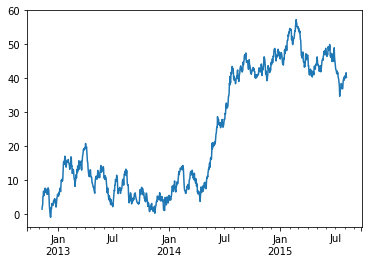

In [188]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('11/10/2012', periods=1000))
ts = ts.cumsum()
ts.plot()

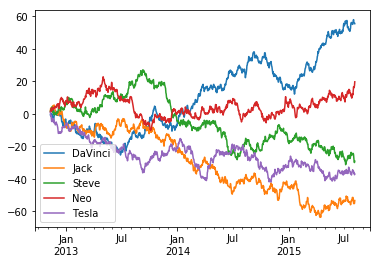

In [207]:
# On DataFrame, plot() is a convenience to plot all of the columns with labels:
df = pd.DataFrame(np.random.randn(1000, 5), index = ts.index,
                 columns = ['DaVinci','Jack','Steve','Neo', 'Tesla'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

## HDF5 

In [208]:
# Writing to a HDF5 Store
df.to_hdf('foo.h5','df')

In [209]:
# Reading and writing to HDFStores
pd.read_hdf('foo.h5','df')

,DaVinci,Jack,Steve,Neo,Tesla
2012-11-10,-0.769546,1.847483,1.536704,1.091675,0.789660
2012-11-11,-1.216143,3.548021,2.268536,2.083222,-1.333701
2012-11-12,-0.077707,3.093488,2.983444,1.112206,-1.175890
2012-11-13,-0.381084,2.308495,2.319284,3.035294,-3.189460
2012-11-14,0.002472,1.864172,3.133152,3.577161,-4.741423
2012-11-15,0.017959,3.462983,4.241022,3.048637,-4.759063
2012-11-16,-0.688420,2.545142,4.062791,2.350120,-4.874134
2012-11-17,-1.100279,4.492600,2.541873,2.132081,-3.842061
2012-11-18,-2.800429,4.960703,0.614341,3.840126,-2.876882
2012-11-19,-4.192587,4.879577,2.368530,2.886141,-4.346896


## Excel 

In [212]:
# Writing to an excel file
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [213]:
# Reading from an excel file
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None,na_values=['NA'])

,DaVinci,Jack,Steve,Neo,Tesla
2012-11-10,-0.769546,1.847483,1.536704,1.091675,0.789660
2012-11-11,-1.216143,3.548021,2.268536,2.083222,-1.333701
2012-11-12,-0.077707,3.093488,2.983444,1.112206,-1.175890
2012-11-13,-0.381084,2.308495,2.319284,3.035294,-3.189460
2012-11-14,0.002472,1.864172,3.133152,3.577161,-4.741423
2012-11-15,0.017959,3.462983,4.241022,3.048637,-4.759063
2012-11-16,-0.688420,2.545142,4.062791,2.350120,-4.874134
2012-11-17,-1.100279,4.492600,2.541873,2.132081,-3.842061
2012-11-18,-2.800429,4.960703,0.614341,3.840126,-2.876882
2012-11-19,-4.192587,4.879577,2.368530,2.886141,-4.346896


## Gotchas 

In [ ]:
# If you are trying an operation and you see an exception like:
if pd.Series([False, True, False]) is not None:
    print("I was not None")

In [ ]:
if pd.Series([False, True, False]).any():
    print("I'm any")
    print("Neo say: See you ...")